начинаем, как всегда, с импортов - для удобства держим все в одной строке

In [51]:
import string
import pandas as pd
import numpy
import pandas_profiling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer_count = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

прочитаем наш файл и посмотрим ему в глаза

In [4]:
all_data = pd.read_csv('Shoes_Data.csv')
all_data

title     price  \
0       CLYMB Outdoor Sports Running Shoes for Mens Boy   ₹279.00   
1                 Bourge Men's Loire-z126 Running Shoes   ₹479.00   
2                                  T-Rock Men's Sneaker   ₹430.00   
3     Robbie jones Sneakers Casual Canvas Fabric Col...   ₹499.00   
4                          Sparx Men's Sd0323g Sneakers   ₹499.00   
...                                                 ...       ...   
1225              Nike Men's React Vision Running Shoes  ₹7256.00   
1226     Puma Men's B.O.G Limitless Hi Evoknit Sneakers  ₹5822.00   
1227  new balance Women's FuelCell Echolucent Runnin...  ₹5362.00   
1228  Nike Women's WMNS Air Zoom Pegasus 37 Running ...  ₹7480.00   
1229      ASICS Women Gt-2000 7 Lite-Show Running Shoes  ₹5719.00   

                  rating  total_reviews  \
0     2.9 out of 5 stars   2389 ratings   
1     3.9 out of 5 stars  11520 ratings   
2     3.3 out of 5 stars   1251 ratings   
3     4.2 out of 5 stars      3 ratings   
4     4.2 out of 5 stars  20110 ratings   
...                  ...            ...   
1225  4.4 out of 5 stars    200 ratings   
1226  4.3 out of 5 stars     25 ratings   
1227  4.5 out of 5 stars    817 ratings   
1228  4.5 out of 5 stars     67 ratings   
1229  4.1 out of 5 stars    210 ratings   

                                    product_description  \
0     Elevate your style with this classy pair of Ru...   
1     The product will be an excellent pick for you....   
2     Flaunt with these stylish and unique red casua...   
3     Robbie Jones Shoes Are Designed To Keeping In ...   
4     Sparx is a spectacular range of footwear from ...   
...                                                 ...   
1225  The Nike react vision is a STORY of surreal co...   
1226  The B.O.G limitless is Puma's key style for th...   
1227  Lead the pack in New Balance’s Echolucent snea...   
1228  Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...   
1229  The GT-2000 7 achieves a reassuringly firm rid...   

                                                reviews  \
0     Not happy with product|| It's not as expected....   
1     Memory cushioning in these shoes is the best f...   
2     Worth to its amount|| Go for it|| Perfect|| 5 ...   
3     Sup quality|| Good but not expected|| Awesome 👌.!   
4     Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...   
...                                                 ...   
1225  Must buy|| not have a great fiting but great q...   
1226  Worth buying !|| Classy Bold and Stylish !!|| ...   
1227  size variation in product recd n size chart|| ...   
1228  Verified Purchase|| Verified Purchase|| Verifi...   
1229  Great shoe|| excellent quality|| Old manufactu...   

                                         reviews_rating Shoe Type  
0     1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...       Men  
1     5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...       Men  
2     5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men  
3     5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...       Men  
4     5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men  
...                                                 ...       ...  
1225  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...     Women  
1226  4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...     Women  
1227  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...     Women  
1228  5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...     Women  
1229  5.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...     Women  

[1230 rows x 8 columns]

круто! сразу видим, какие у нас будут проблемы - придется чистить текст от лишних символов, цена и рейтинг не представлены в числовом формате и требуют очистки, ревью и рейтинг тоже черт-те как уложены. Посмотрим хоть есть ли пустые строки.

In [5]:
all_data.isna().any(axis=None)

False

ладно, уже хорошо. Глянем, что там по типам данных

In [6]:
all_data.dtypes

title                  object
price                  object
rating                 object
total_reviews          object
product_description    object
reviews                object
reviews_rating         object
Shoe Type              object
dtype: object

какая прелесть - ожидаемо, у нас нет ни одной нормальной колонки. Начнем тогда с разделения ревью и рейтингов на каждую модель

In [7]:
sep_reviews = []
sep_ratings = []
for model in all_data.reviews:
    sep_reviews.append(model.split('|| '))
for model_1 in all_data.reviews_rating:
    entry_list = model_1.split('|| ')
    sep_ratings.append([x[0] for x in entry_list])
sep_ratings

[['1', '1', '3', '3', '3', '2', '1', '2', '1', '1'],
 ['5', '1', '5', '5', '4', '5', '5', '5', '4', '5'],
 ['5', '5', '5', '5', '1', '1', '5', '4', '1', '1'],
 ['5', '3', '5'],
 ['5', '5', '5', '5', '5', '5', '1', '3', '2', '5'],
 ['5', '4', '4', '1', '2', '3', '1', '4', '5', '2'],
 ['5', '1', '4', '5', '4', '2', '5', '4', '3', '1'],
 ['1', '1', '5', '1', '5', '5', '1', '3', '1', '1'],
 ['5', '5', '5', '4', '5', '5', '5', '4', '5', '4'],
 ['5', '1'],
 ['5', '1', '5', '1', '3', '1', '1', '1', '2', '2'],
 ['3', '4', '5', '5', '4', '5', '4'],
 ['1', '5'],
 ['5', '5', '5', '5', '5', '1', '1', '3', '3', '4'],
 ['2', '1', '5', '2', '1', '5', '2', '1', '1', '5'],
 ['1', '5', '4', '5', '5', '5', '4', '5', '5', '4'],
 ['1', '5', '4', '1', '3', '4', '5', '5', '3', '3'],
 ['1', '5', '5', '4', '4', '1', '1', '1', '3'],
 ['5', '4', '4', '5'],
 ['3', '2', '5', '5', '4', '5', '4', '1', '5', '5'],
 ['5', '5', '5', '1', '4', '1', '5', '4', '3', '4'],
 ['3', '5', '5', '5', '5', '1', '2', '4', '4', '5'],

красивое. Проверим, не потерялось ли чего в процессе, сверив необходимое количество моделей и количества отзывов и рейтингов

In [8]:
assert len(sep_reviews) == len(all_data) and len(sep_ratings) == len(all_data)

прекрасно. Теперь можно и привести в нормальный вид несколько колонок и добавить колонки со списками ревью и рейтингов

In [9]:
all_data_train = all_data.assign(price = all_data.price.str.strip('₹'),
                                rating = [x[0] for x in all_data.rating.str.split(' ')],
                                total_reviews = [z[0] for z in all_data.total_reviews.str.split(' ')],
                                reviews = sep_reviews,
                                reviews_rating = sep_ratings)
all_data_train

title    price rating  \
0       CLYMB Outdoor Sports Running Shoes for Mens Boy   279.00    2.9   
1                 Bourge Men's Loire-z126 Running Shoes   479.00    3.9   
2                                  T-Rock Men's Sneaker   430.00    3.3   
3     Robbie jones Sneakers Casual Canvas Fabric Col...   499.00    4.2   
4                          Sparx Men's Sd0323g Sneakers   499.00    4.2   
...                                                 ...      ...    ...   
1225              Nike Men's React Vision Running Shoes  7256.00    4.4   
1226     Puma Men's B.O.G Limitless Hi Evoknit Sneakers  5822.00    4.3   
1227  new balance Women's FuelCell Echolucent Runnin...  5362.00    4.5   
1228  Nike Women's WMNS Air Zoom Pegasus 37 Running ...  7480.00    4.5   
1229      ASICS Women Gt-2000 7 Lite-Show Running Shoes  5719.00    4.1   

     total_reviews                                product_description  \
0             2389  Elevate your style with this classy pair of Ru...   
1            11520  The product will be an excellent pick for you....   
2             1251  Flaunt with these stylish and unique red casua...   
3                3  Robbie Jones Shoes Are Designed To Keeping In ...   
4            20110  Sparx is a spectacular range of footwear from ...   
...            ...                                                ...   
1225           200  The Nike react vision is a STORY of surreal co...   
1226            25  The B.O.G limitless is Puma's key style for th...   
1227           817  Lead the pack in New Balance’s Echolucent snea...   
1228            67  Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...   
1229           210  The GT-2000 7 achieves a reassuringly firm rid...   

                                                reviews  \
0     [Not happy with product, It's not as expected....   
1     [Memory cushioning in these shoes is the best ...   
2     [Worth to its amount, Go for it, Perfect, 5 st...   
3     [Sup quality, Good but not expected, Awesome 👌.!]   
4     [Best, Satisfied!, Affordable beauty 😘😘😘😘 the ...   
...                                                 ...   
1225  [Must buy, not have a great fiting but great q...   
1226  [Worth buying !, Classy Bold and Stylish !!, N...   
1227  [size variation in product recd n size chart, ...   
1228  [Verified Purchase, Verified Purchase, Verifie...   
1229  [Great shoe, excellent quality, Old manufactur...   

                      reviews_rating Shoe Type  
0     [1, 1, 3, 3, 3, 2, 1, 2, 1, 1]       Men  
1     [5, 1, 5, 5, 4, 5, 5, 5, 4, 5]       Men  
2     [5, 5, 5, 5, 1, 1, 5, 4, 1, 1]       Men  
3                          [5, 3, 5]       Men  
4     [5, 5, 5, 5, 5, 5, 1, 3, 2, 5]       Men  
...                              ...       ...  
1225  [5, 3, 5, 5, 5, 5, 5, 2, 4, 5]     Women  
1226  [4, 5, 3, 5, 5, 5, 5, 5, 5, 5]     Women  
1227  [5, 5, 5, 5, 1, 5, 3, 2, 5, 5]     Women  
1228  [5, 5, 4, 5, 5, 5, 5, 3, 5, 1]     Women  
1229  [5, 5, 3, 5, 1, 5, 5, 5, 5, 5]     Women  

[1230 rows x 8 columns]

выглядит все лучше и лучше! переделаем типы данных

In [10]:
all_data_train = all_data_train.astype({'price': 'float', 'rating': 'float', 'total_reviews': 'int'})

*+ если бы мы в дальнейшем использовали колонку типа обуви, мы бы, конечно, закодировали ее ванхотом*

а сейчас я буду делать кое-что контринтуитивное - урезать наш и так скромного размера датасет.
Дело в том, что количество ревью и рейтингов на каждую модель подчиняется такой закономерности - их максимум 10, минимум 1, к нам попадает не больше 10. Мне кажется, что разница в количестве отзывов между моделями станет дополнительным неучтенным параметром, влияющим на дальнейшее предсказание - хотя бы если мы начнем векторизовать отзывы относительно всего массива отзывов на данную модель. А вдруг мы так и поступим? 
В принципе, в качестве отдельного эксперимента можно потом все вернуть и взять количество отзывов в качестве дополнительного параметра - но если наша основная цель это предсказание рейтинга по векторизованному отзыву, то я предпочту избавиться от возможного скрытого влияния количества отзывов на векторное пространство и просто отсеять все случаи, когда отзывов слишком мало. В конце концов, если качество будет сильно плохим, всегда можно их вернуть.

In [11]:
all_data_final = all_data_train[all_data_train['reviews_rating'].map(len) == 10].copy()
all_data_final

title   price  rating  \
0       CLYMB Outdoor Sports Running Shoes for Mens Boy   279.0     2.9   
1                 Bourge Men's Loire-z126 Running Shoes   479.0     3.9   
2                                  T-Rock Men's Sneaker   430.0     3.3   
4                          Sparx Men's Sd0323g Sneakers   499.0     4.2   
5           Inklenzo White Shoes for Mens for Daily USE   449.0     3.5   
...                                                 ...     ...     ...   
1225              Nike Men's React Vision Running Shoes  7256.0     4.4   
1226     Puma Men's B.O.G Limitless Hi Evoknit Sneakers  5822.0     4.3   
1227  new balance Women's FuelCell Echolucent Runnin...  5362.0     4.5   
1228  Nike Women's WMNS Air Zoom Pegasus 37 Running ...  7480.0     4.5   
1229      ASICS Women Gt-2000 7 Lite-Show Running Shoes  5719.0     4.1   

      total_reviews                                product_description  \
0              2389  Elevate your style with this classy pair of Ru...   
1             11520  The product will be an excellent pick for you....   
2              1251  Flaunt with these stylish and unique red casua...   
4             20110  Sparx is a spectacular range of footwear from ...   
5               224     CASUAL SHOES FOR BOYS AND MENS IN WHITE COLOUR   
...             ...                                                ...   
1225            200  The Nike react vision is a STORY of surreal co...   
1226             25  The B.O.G limitless is Puma's key style for th...   
1227            817  Lead the pack in New Balance’s Echolucent snea...   
1228             67  Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...   
1229            210  The GT-2000 7 achieves a reassuringly firm rid...   

                                                reviews  \
0     [Not happy with product, It's not as expected....   
1     [Memory cushioning in these shoes is the best ...   
2     [Worth to its amount, Go for it, Perfect, 5 st...   
4     [Best, Satisfied!, Affordable beauty 😘😘😘😘 the ...   
5     [Awesome, Nice Product, Nic fitting, Poor qual...   
...                                                 ...   
1225  [Must buy, not have a great fiting but great q...   
1226  [Worth buying !, Classy Bold and Stylish !!, N...   
1227  [size variation in product recd n size chart, ...   
1228  [Verified Purchase, Verified Purchase, Verifie...   
1229  [Great shoe, excellent quality, Old manufactur...   

                      reviews_rating Shoe Type  
0     [1, 1, 3, 3, 3, 2, 1, 2, 1, 1]       Men  
1     [5, 1, 5, 5, 4, 5, 5, 5, 4, 5]       Men  
2     [5, 5, 5, 5, 1, 1, 5, 4, 1, 1]       Men  
4     [5, 5, 5, 5, 5, 5, 1, 3, 2, 5]       Men  
5     [5, 4, 4, 1, 2, 3, 1, 4, 5, 2]       Men  
...                              ...       ...  
1225  [5, 3, 5, 5, 5, 5, 5, 2, 4, 5]     Women  
1226  [4, 5, 3, 5, 5, 5, 5, 5, 5, 5]     Women  
1227  [5, 5, 5, 5, 1, 5, 3, 2, 5, 5]     Women  
1228  [5, 5, 4, 5, 5, 5, 5, 3, 5, 1]     Women  
1229  [5, 5, 3, 5, 1, 5, 5, 5, 5, 5]     Women  

[848 rows x 8 columns]

четверть случаев - до свидания! Ух, весело. Я бы с радостью строила прикольные графики и получала за них хорошие оценки, но к сожалению питон знает модуль для изучения данных, и им мы сейчас и воспользуемся

In [12]:
all_data_final.profile_report()

начнем смотреть, что тут у нас может вызвать проблемы.

дисбаланс цен для регрессии! судя по графику, большая часть моделей продается за цену до 2500, со средним в 1845, минимумом в 127 и максимумом в 7480. Довольно-таки неприятный дисбаланс, но пока у нас тут не классификация, так что можно потерпеть.

Дисбаланс рейтингов! А вот этот график нам пока ничего не скажет особо, разве что опосредованно - это ведь совокупные рейтинги, а мы будем делать прогнозы для конкретных ревью с конкретным рейтингом, которых у нас тут пока нет. Так что пока отложим этот вопрос.

В принципе, раздел со взаимодействиями...любопытный - кажется, есть взаимосвязи между сборным рейтингом и ценой? К счастью, это не входит в наше задание - но все равно любопытно.

ладно, начнем укладывать наши рейтинги-ревью в удобный формат

In [13]:
ratings_frame = all_data_final.reviews_rating.apply(pd.Series)
ratings_frame = ratings_frame.add_suffix('_rating')
ratings_frame

0_rating 1_rating 2_rating 3_rating 4_rating 5_rating 6_rating 7_rating  \
0           1        1        3        3        3        2        1        2   
1           5        1        5        5        4        5        5        5   
2           5        5        5        5        1        1        5        4   
4           5        5        5        5        5        5        1        3   
5           5        4        4        1        2        3        1        4   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1225        5        3        5        5        5        5        5        2   
1226        4        5        3        5        5        5        5        5   
1227        5        5        5        5        1        5        3        2   
1228        5        5        4        5        5        5        5        3   
1229        5        5        3        5        1        5        5        5   

     8_rating 9_rating  
0           1        1  
1           4        5  
2           1        1  
4           2        5  
5           5        2  
...       ...      ...  
1225        4        5  
1226        5        5  
1227        5        5  
1228        5        1  
1229        5        5  

[848 rows x 10 columns]

не встретилось ли случаев, когда модель вообще никто не оценил, или когда все сломалось и у нас все-таки протекли модели с количеством рейтингов меньше 10?

In [14]:
ratings_frame.isna().mean()

0_rating    0.0
1_rating    0.0
2_rating    0.0
3_rating    0.0
4_rating    0.0
5_rating    0.0
6_rating    0.0
7_rating    0.0
8_rating    0.0
9_rating    0.0
dtype: float64

фух.

# vectors and words

векторризация! для начала, уложим и наши отзывы в такой же удобоваримый датафреймчик, и заодно докинем туда описание продукта

In [15]:
reviews_frame_unclean = all_data_final.reviews.apply(pd.Series)
reviews_frame_unclean = reviews_frame_unclean.add_suffix('_review')

In [16]:
reviews_frame_unclean['product_description'] = all_data_final['product_description'].copy()

In [17]:
reviews_frame_unclean

0_review  \
0                                Not happy with product   
1     Memory cushioning in these shoes is the best f...   
2                                   Worth to its amount   
4                                                  Best   
5                                               Awesome   
...                                                 ...   
1225                                           Must buy   
1226                                     Worth buying !   
1227        size variation in product recd n size chart   
1228                                  Verified Purchase   
1229                                         Great shoe   

                                       1_review  \
0                         It's not as expected.   
1                          Poor quality product   
2                                     Go for it   
4                                    Satisfied!   
5                                  Nice Product   
...                                         ...   
1225  not have a great fiting but great quality   
1226                 Classy Bold and Stylish !!   
1227                               Report abuse   
1228                          Verified Purchase   
1229                          excellent quality   

                                      2_review                      3_review  \
0                              AVERAGE PRODUCT            Pic more beautiful   
1                        Best for gym n sports            Must must must buy   
2                                      Perfect                        5 star   
4     Affordable beauty 😘😘😘😘 the eye catcher 😊  Economical and soft for feet   
5                                  Nic fitting          Poor quality product   
...                                        ...                           ...   
1225                              Report abuse             Verified Purchase   
1226                       Not a great product               awesome comfort   
1227                              Report abuse             Verified Purchase   
1228                         Verified Purchase                  Report abuse   
1229     Old manufactured products being sold.             Comfortable shoes   

                                               4_review  \
0     Got damage product. But quality is average for...   
1                                  Worth for this price   
2                                     Itam not received   
4            Good looking shoe however buy one size low   
5                                                 Shoes   
...                                                 ...   
1225                                  Verified Purchase   
1226                                       Great design   
1227                                       Report abuse   
1228                                  Verified Purchase   
1229      Old stock teared in just 1.5 month of running   

                                        5_review  \
0     Bad product different from what was listed   
1                                      Satisfied   
2                 Worst product .please dont buy   
4                              Must bye for puja   
5                                           Nice   
...                                          ...   
1225                           Verified Purchase   
1226                                      Trendy   
1227                           Verified Purchase   
1228                                Report abuse   
1229                                  Go for it!   

                             6_review                            7_review  \
0                       Worst product                           Don't buy   
1                Please try this shoe  Very good for heels. Comfy cushion   
2                          Nice Shoes                       Pros and cons   
4     Why so much variation in sizes.         Review after 30 days of use   
5                                 Bad        

и в строке 1228 замечаем страшное! Кажется, хинди. Посмотрим поближе.

In [18]:
trainwheel = reviews_frame_unclean['product_description'][1228]
trainwheel

"Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువుగా మరియు ఆకర్షణీయంగా ఉంటుంది. అయినప్పటికీ మీ మొదటి 5K నుండి మీ తాజా మారథాన్ వరకు మీ ఉత్తమమైన వాటిని నడపడానికి ఇది అద్భుతమైన మద్దతును అందిస్తుంది మరియు ప్రతి స్ట్రైడ్తో అల్ట్రా-రెస్పాన్సివ్ అనుభూతిని అందిస్తుంది.______The Nike women's running shoe feels and even looks soft and plush. Yet it provides incredible support to help you run your best from your first 5K to your latest marathon and delivers an ultra-responsive feel with each stride.______Nike സ്ത്രീകളുടെ റണ്ണിംഗ് ഷൂ ഫീലും തോന്നലും മൃദുവും മൃദുവുമാണ്. എന്നിരുന്നാലും നിങ്ങളുടെ ആദ്യത്തെ 5 K മുതൽ നിങ്ങളുടെ ഏറ്റവും പുതിയ മാരത്തൂണിൽ നിന്ന് ഏറ്റവും പുതിയ മറാത്തിനിലേക്ക് ഓടാൻ സഹായിക്കുന്നതിന് അവിശ്വസനീയമായ പിന്തുണ നൽകുന്നു ഒപ്പം ഓരോ സ്ട്രിംഗിലും അൾട്രാ-റെസ്പോൺസീവ് അനുഭവം നൽകുന്നു.______Nike பெண்களுக்கான ரன்னிங் ஷூ ஃபீல் மற்றும் தோற்றத்துடன் மென்மையாகவும் பட்டுபோன்றும் கூட. இருப்பினும் உங்கள் முதல் 5K முதல் உங்கள் சமீபத்திய மராத்தான் வரை உங்கள் சிறந்ததை இயக்க உதவும் நம்பமுடியாத ஆதரவை இது வழ

ух ты. Впрочем, нам все равно это все пришлось бы от всяких смайликов чистить. Одним non-ascii символом больше, одним меньше.

In [19]:
our_letters = "\' -qwertyuiopasdfghjklzxcvbnm1234567890"

def remove_non_ascii(s):
    first = ''.join(list(filter(lambda x: x.lower() in our_letters, s)))
    return ' '.join([i.lower() for i in first.split(' ') if i!=''])

In [20]:
remove_non_ascii(trainwheel)

"nike 5k - the nike women's running shoe feels and even looks soft and plush yet it provides incredible support to help you run your best from your first 5k to your latest marathon and delivers an ultra-responsive feel with each stridenike 5 k - nike 5k - nike 5k - nike 5k -"

Разве это не красиво? Очень. Поглажу себя по голове.

Теперь то же самое, только на весь фрейм, и заодно индексацию обновим

In [21]:
reviews_frame = reviews_frame_unclean.applymap(lambda x: remove_non_ascii(x)).reset_index(drop=True)
reviews_frame

0_review  \
0                               not happy with product   
1    memory cushioning in these shoes is the best f...   
2                                  worth to its amount   
3                                                 best   
4                                              awesome   
..                                                 ...   
843                                           must buy   
844                                       worth buying   
845        size variation in product recd n size chart   
846                                  verified purchase   
847                                         great shoe   

                                      1_review  \
0                         it's not as expected   
1                         poor quality product   
2                                    go for it   
3                                    satisfied   
4                                 nice product   
..                                         ...   
843  not have a great fiting but great quality   
844                    classy bold and stylish   
845                               report abuse   
846                          verified purchase   
847                          excellent quality   

                                 2_review                      3_review  \
0                         average product            pic more beautiful   
1                   best for gym n sports            must must must buy   
2                                 perfect                        5 star   
3       affordable beauty the eye catcher  economical and soft for feet   
4                             nic fitting          poor quality product   
..                                    ...                           ...   
843                          report abuse             verified purchase   
844                   not a great product               awesome comfort   
845                          report abuse             verified purchase   
846                     verified purchase                  report abuse   
847  old manufactured products being sold             comfortable shoes   

                                              4_review  \
0    got damage product but quality is average for 300   
1                                 worth for this price   
2                                    itam not received   
3           good looking shoe however buy one size low   
4                                                shoes   
..                                                 ...   
843                                  verified purchase   
844                                       great design   
845                                       report abuse   
846                                  verified purchase   
847       old stock teared in just 15 month of running   

                                       5_review  \
0    bad product different from what was listed   
1                                     satisfied   
2                 worst product please dont buy   
3                             must bye for puja   
4                                          nice   
..                                          ...   
843                           verified purchase   
844                                      trendy   
845                           verified purchase   
846                                report abuse   
847                                   go for it   

                           6_review                           7_review  \
0                     worst product                          don't buy   
1              please try this shoe  very good for heels comfy cushion   
2                        nice shoes                      pros and cons   
3    why so much variation in sizes        review after 30 days of use   
4                               bad                   fits comfortably   
..                              ...                                ...   
843               v

ничего не пропало? не встретилось отзывов или описаний, которые состояли только из ненужных символов?

In [22]:
reviews_frame.isna().mean()

0_review               0.0
1_review               0.0
2_review               0.0
3_review               0.0
4_review               0.0
5_review               0.0
6_review               0.0
7_review               0.0
8_review               0.0
9_review               0.0
product_description    0.0
dtype: float64

фух.

# regressor

а вот и мы! А вот и регрессор! Начинаем векторизовать и радоваться жизни через обычный count_vectorizer - применяем его к описаниям продукта

In [52]:
vectors_count = vectorizer_count.fit_transform(reviews_frame['product_description'])
count_vect_df = pd.DataFrame(vectors_count.todense())

In [53]:
vectors_tfidf = vectorizer_tfidf.fit_transform(reviews_frame['product_description'])
tfidf_vect_df = pd.DataFrame(vectors_tfidf.todense())

In [54]:
count_vect_df

0     1     2     3     4     5     6     7     8     9     ...  3270  \
0       0     0     0     0     0     0     0     0     0     0  ...     0   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     1   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
843     0     0     0     0     0     0     0     0     0     0  ...     0   
844     0     0     0     0     0     0     0     0     0     0  ...     0   
845     0     0     0     0     0     0     0     0     0     0  ...     0   
846     0     0     0     0     0     0     0     0     0     0  ...     0   
847     0     0     0     0     0     0     0     0     0     0  ...     0   

     3271  3272  3273  3274  3275  3276  3277  3278  3279  
0       0     0     0     0     0     0     0     0     0  
1       0     0     0     0     0     0     0     0     0  
2       0     0     0     0     0     0     0     0     0  
3       0     0     0     0     0     0     0     0     0  
4       0     0     0     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
843     0     0     0     0     0     0     0     0     0  
844     0     0     0     0     0     0     0     0     0  
845     0     0     0     0     0     0     0     0     0  
846     0     0     0     0     0     0     0     0     0  
847     0     0     0     0     0     0     0     0     0  

[848 rows x 3280 columns]

In [55]:
tfidf_vect_df

0     1     2     3     4     5     6     7     8     9     ...  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
843   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
844   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
845   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
846   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
847   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

         3270  3271  3272  3273  3274  3275  3276  3277  3278  3279  
0    0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1    0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2    0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3    0.074699   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4    0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
..        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
843  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
844  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
845  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
846  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
847  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[848 rows x 3280 columns]

ух, страх-то какой. Пойдемте сделаем из этого Х и таргет.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(count_vect_df, all_data_final['price'], random_state=42)

In [57]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf_vect_df, all_data_final['price'], random_state=42)

Начинается бойня! Типа. Просто применим девять самых популярных алгоритмов регрессии и посмотрим, как они себя просто на этом датасете покажут, пока без гридсерча.

In [58]:
regressor = Lasso(alpha=10)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

726.4168860500419

In [59]:
regressor_tf = Lasso(alpha=10)
regressor_tf.fit(X_train_tf, y_train_tf)
preds_tf = regressor_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_tf)

1056.0292507290292

In [70]:
regressor_1 = Ridge(alpha=1.0)
regressor_1.fit(X_train, y_train)
preds_1 = regressor_1.predict(X_test)
mean_absolute_error(y_test, preds_1)

612.0582140084445

In [71]:
regressor_1_tf = Ridge(alpha=1.0)
regressor_1_tf.fit(X_train_tf, y_train_tf)
preds_1_tf = regressor_1_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_1_tf)

636.7194973940078

In [72]:
from sklearn.kernel_ridge import KernelRidge
regressor_2 = KernelRidge(alpha=1.0)
regressor_2.fit(X_train, y_train)
preds_2 = regressor_2.predict(X_test)
mean_absolute_error(y_test, preds_2)

787.8706633391995

In [73]:
regressor_2_tf = KernelRidge(alpha=1.0)
regressor_2_tf.fit(X_train_tf, y_train_tf)
preds_2_tf = regressor_2_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_2_tf)

698.1419017303374

In [74]:
from sklearn.linear_model import LinearRegression
regressor_3 = LinearRegression()
regressor_3.fit(X_train, y_train)
preds_3 = regressor_3.predict(X_test)
mean_absolute_error(y_test, preds_3)

96456556483144.53

In [75]:
regressor_3_tf = LinearRegression()
regressor_3_tf.fit(X_train_tf, y_train_tf)
preds_3_tf = regressor_3_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_3_tf)

423683917933279.75

In [76]:
from lightgbm import LGBMRegressor
regressor_4 = LGBMRegressor()
regressor_4.fit(X_train, y_train)
preds_4 = regressor_4.predict(X_test)
mean_absolute_error(y_test, preds_4)

537.2161900276159

In [77]:
regressor_4_tf = LGBMRegressor()
regressor_4_tf.fit(X_train_tf, y_train_tf)
preds_4_tf = regressor_4_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_4_tf)

505.53302930732013

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
regressor_5 = GradientBoostingRegressor()
regressor_5.fit(X_train, y_train)
preds_5 = regressor_5.predict(X_test)
mean_absolute_error(y_test, preds_5)

629.5689299707491

In [79]:
regressor_5_tf = GradientBoostingRegressor()
regressor_5_tf.fit(X_train_tf, y_train_tf)
preds_5_tf = regressor_5_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_5_tf)

613.0049161680726

In [80]:
from sklearn.linear_model import BayesianRidge
regressor_6 = BayesianRidge()
regressor_6.fit(X_train, y_train)
preds_6 = regressor_6.predict(X_test)
mean_absolute_error(y_test, preds_6)

600.3175868943249

In [81]:
regressor_6_tf = BayesianRidge()
regressor_6_tf.fit(X_train_tf, y_train_tf)
preds_6_tf = regressor_6_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_6_tf)

514.122375802008

In [82]:
from sklearn.linear_model import SGDRegressor
regressor_7 = SGDRegressor()
regressor_7.fit(X_train, y_train)
preds_7 = regressor_7.predict(X_test)
mean_absolute_error(y_test, preds_7)

598.3217813861839

In [86]:
regressor_7_tf = SGDRegressor(max_iter=1000)
regressor_7_tf.fit(X_train_tf, y_train_tf)
preds_7_tf = regressor_7.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_7_tf)

C:\conda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


1100.624297062065

In [43]:
from catboost import CatBoostRegressor
regressor_8 = CatBoostRegressor()
regressor_8.fit(X_train, y_train)
preds_8 = regressor_8.predict(X_test)
mean_absolute_error(y_test, preds_8)

Learning rate set to 0.036009
0:	learn: 1551.5288204	total: 182ms	remaining: 3m 1s
1:	learn: 1534.8207612	total: 191ms	remaining: 1m 35s
2:	learn: 1518.1499033	total: 202ms	remaining: 1m 7s
3:	learn: 1504.6491332	total: 214ms	remaining: 53.3s
4:	learn: 1492.8250730	total: 223ms	remaining: 44.4s
5:	learn: 1476.1788946	total: 232ms	remaining: 38.5s
6:	learn: 1462.4238248	total: 241ms	remaining: 34.3s
7:	learn: 1449.3208884	total: 250ms	remaining: 31.1s
8:	learn: 1435.4773556	total: 259ms	remaining: 28.5s
9:	learn: 1421.4956358	total: 268ms	remaining: 26.6s
10:	learn: 1411.5280132	total: 277ms	remaining: 24.9s
11:	learn: 1402.9336046	total: 286ms	remaining: 23.5s
12:	learn: 1390.9971210	total: 294ms	remaining: 22.3s
13:	learn: 1381.5463192	total: 303ms	remaining: 21.3s
14:	learn: 1371.6312629	total: 311ms	remaining: 20.5s
15:	learn: 1360.8884508	total: 320ms	remaining: 19.7s
16:	learn: 1350.2362368	total: 329ms	remaining: 19s
17:	learn: 1341.0459487	total: 339ms	remaining: 18.5s
18:	learn

526.5024546642301

In [88]:
regressor_8_tf = CatBoostRegressor()
regressor_8_tf.fit(X_train_tf, y_train_tf)
preds_8_tf = regressor_8_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_8_tf)

Learning rate set to 0.036009
0:	learn: 1550.8799960	total: 18.1ms	remaining: 18.1s
1:	learn: 1535.8837910	total: 33.1ms	remaining: 16.5s
2:	learn: 1520.9831973	total: 47.8ms	remaining: 15.9s
3:	learn: 1505.5080043	total: 62.4ms	remaining: 15.5s
4:	learn: 1488.9139155	total: 76.7ms	remaining: 15.3s
5:	learn: 1477.4996837	total: 91.2ms	remaining: 15.1s
6:	learn: 1463.8212738	total: 105ms	remaining: 14.9s
7:	learn: 1447.7178605	total: 120ms	remaining: 14.8s
8:	learn: 1436.2712150	total: 134ms	remaining: 14.8s
9:	learn: 1424.8827176	total: 148ms	remaining: 14.7s
10:	learn: 1411.9431166	total: 162ms	remaining: 14.6s
11:	learn: 1401.1832820	total: 178ms	remaining: 14.7s
12:	learn: 1390.5192534	total: 194ms	remaining: 14.7s
13:	learn: 1379.6636448	total: 210ms	remaining: 14.8s
14:	learn: 1368.3074407	total: 226ms	remaining: 14.9s
15:	learn: 1357.5486732	total: 240ms	remaining: 14.8s
16:	learn: 1348.5142237	total: 254ms	remaining: 14.7s
17:	learn: 1338.6170672	total: 268ms	remaining: 14.6s
18

494.0200800063693

In [90]:
from sklearn.ensemble import AdaBoostRegressor
regressor_9 = AdaBoostRegressor()
regressor_9.fit(X_train, y_train)
preds_9 = regressor_9.predict(X_test)
mean_absolute_error(y_test, preds_9)

1014.91920347636

In [91]:
regressor_9_tf = AdaBoostRegressor()
regressor_9_tf.fit(X_train_tf, y_train_tf)
preds_9_tf = regressor_9_tf.predict(X_test_tf)
mean_absolute_error(y_test_tf, preds_9_tf)

988.1024987269234

самое красивое - catboost, lgbm. В принципе, для моделек, которым даже параметры не налаживали, ошибка у них очень даже ничего.

пора отлаживать наших финалистов!

In [66]:
param_grid_4 = {'learning_rate': [0.01, 0.1, 0.5, 0.8, 1, 1.5, 2], 
                'max_depth': [x*2 for x in range(1,15)], 
                'num_leaves': [x*2 for x in range(1,15)], 
                'reg_alpha': [0.1, 0.5, 0.8, 1]
               }
param_grid_8 = {'learning_rate': [0.1, 0.5],
                'max_depth': [6, 7, 8],
                'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [36]:
grid_search_4 = GridSearchCV(LGBMRegressor(), param_grid=param_grid_4, scoring='neg_mean_absolute_error', verbose=2)
grid_search_4.fit(X_train, y_train)
print('Best score: {}'.format(grid_search_4.best_score_))
print('Best parameters: {}'.format(grid_search_4.best_params_))

Fitting 5 folds for each of 5488 candidates, totalling 27440 fits
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, num_leaves=2, reg_alpha=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_d

In [87]:
lgbm_optimal = LGBMRegressor(learning_rate = 0.5, max_depth = 18, num_leaves = 18, reg_alpha = 0.1)
lgbm_optimal.fit(X_train_tf, y_train_tf)
lgbm_preds = lgbm_optimal.predict(X_test_tf)
mean_absolute_error(y_test_tf, lgbm_preds)

494.070862233851

In [67]:
grid_search_8 = CatBoostRegressor().grid_search(param_grid_8, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 848.9317737
bestIteration = 696

0:	loss: 848.9317737	best: 848.9317737 (0)	total: 9.31s	remaining: 4m 30s

bestTest = 816.0636318
bestIteration = 57

1:	loss: 816.0636318	best: 816.0636318 (1)	total: 19.1s	remaining: 4m 27s

bestTest = 838.0404019
bestIteration = 622

2:	loss: 838.0404019	best: 816.0636318 (1)	total: 30.6s	remaining: 4m 35s

bestTest = 849.5880749
bestIteration = 97

3:	loss: 849.5880749	best: 816.0636318 (1)	total: 42s	remaining: 4m 32s

bestTest = 802.5374825
bestIteration = 879

4:	loss: 802.5374825	best: 802.5374825 (4)	total: 53.3s	remaining: 4m 26s

bestTest = 835.2573017
bestIteration = 209

5:	loss: 835.2573017	best: 802.5374825 (4)	total: 1m 5s	remaining: 4m 22s

bestTest = 806.5481909
bestIteration = 972

6:	loss: 806.5481909	best: 802.5374825 (4)	total: 1m 16s	remaining: 4m 9s

bestTest = 814.1152245
bestIteration = 191

7:	loss: 814.1152245	best: 802.5374825 (4)	total: 1m 26s	remaining: 3m 58s

bestTest = 819.0890385
bestIteration = 998

8:	los

In [89]:
cat_optimal = CatBoostRegressor(depth=8, learning_rate=0.5, l2_leaf_reg=3)
cat_optimal.fit(X_train_tf, y_train_tf)
cat_preds = cat_optimal.predict(X_test_tf)
mean_absolute_error(y_test_tf, cat_preds)

0:	learn: 1363.0386553	total: 42.7ms	remaining: 42.6s
1:	learn: 1240.6294416	total: 83ms	remaining: 41.4s
2:	learn: 1167.6799121	total: 121ms	remaining: 40.1s
3:	learn: 1080.7721675	total: 157ms	remaining: 39s
4:	learn: 995.0770477	total: 192ms	remaining: 38.1s
5:	learn: 953.3984388	total: 226ms	remaining: 37.5s
6:	learn: 926.5700905	total: 267ms	remaining: 37.9s
7:	learn: 870.0994505	total: 303ms	remaining: 37.6s
8:	learn: 837.5004474	total: 339ms	remaining: 37.3s
9:	learn: 826.1335949	total: 375ms	remaining: 37.1s
10:	learn: 797.6569853	total: 411ms	remaining: 36.9s
11:	learn: 761.8409967	total: 448ms	remaining: 36.9s
12:	learn: 742.7281310	total: 487ms	remaining: 37s
13:	learn: 721.0000895	total: 523ms	remaining: 36.8s
14:	learn: 692.9751187	total: 564ms	remaining: 37.1s
15:	learn: 679.2368578	total: 604ms	remaining: 37.2s
16:	learn: 640.0323915	total: 643ms	remaining: 37.2s
17:	learn: 609.5827687	total: 684ms	remaining: 37.3s
18:	learn: 591.7750961	total: 719ms	remaining: 37.1s
19:

472.23117983962885

# classifier

время пришло. Классификатор.

воскресим в памяти наш фрейм с отзывами и посмотрим на него снова

In [93]:
reviews_frame

0_review  \
0                               not happy with product   
1    memory cushioning in these shoes is the best f...   
2                                  worth to its amount   
3                                                 best   
4                                              awesome   
..                                                 ...   
843                                           must buy   
844                                       worth buying   
845        size variation in product recd n size chart   
846                                  verified purchase   
847                                         great shoe   

                                      1_review  \
0                         it's not as expected   
1                         poor quality product   
2                                    go for it   
3                                    satisfied   
4                                 nice product   
..                                         ...   
843  not have a great fiting but great quality   
844                    classy bold and stylish   
845                               report abuse   
846                          verified purchase   
847                          excellent quality   

                                 2_review                      3_review  \
0                         average product            pic more beautiful   
1                   best for gym n sports            must must must buy   
2                                 perfect                        5 star   
3       affordable beauty the eye catcher  economical and soft for feet   
4                             nic fitting          poor quality product   
..                                    ...                           ...   
843                          report abuse             verified purchase   
844                   not a great product               awesome comfort   
845                          report abuse             verified purchase   
846                     verified purchase                  report abuse   
847  old manufactured products being sold             comfortable shoes   

                                              4_review  \
0    got damage product but quality is average for 300   
1                                 worth for this price   
2                                    itam not received   
3           good looking shoe however buy one size low   
4                                                shoes   
..                                                 ...   
843                                  verified purchase   
844                                       great design   
845                                       report abuse   
846                                  verified purchase   
847       old stock teared in just 15 month of running   

                                       5_review  \
0    bad product different from what was listed   
1                                     satisfied   
2                 worst product please dont buy   
3                             must bye for puja   
4                                          nice   
..                                          ...   
843                           verified purchase   
844                                      trendy   
845                           verified purchase   
846                                report abuse   
847                                   go for it   

                           6_review                           7_review  \
0                     worst product                          don't buy   
1              please try this shoe  very good for heels comfy cushion   
2                        nice shoes                      pros and cons   
3    why so much variation in sizes        review after 30 days of use   
4                               bad                   fits comfortably   
..                              ...                                ...   
843               v

прелестно. Теперь нам нужен датафрейм, в котором одному отзыву будет соответствовать один рейтинг. Как же мы этого добьемся?

Начнем с того, что подтащим сюда фрейм с рейтингами и заодно обновим и ему индексацию

In [94]:
ratings_frame = ratings_frame.reset_index(drop=True)

нам нужен первый фрейм, чтобы к нему добавлять остальные - так что для каждого первого отзыва на модель добавим каждый первый рейтинг на модель. К счастью, данные мы сохранили пронумерованными в таком стиле, так что ничего не перепутается.

In [95]:
main_frame = pd.concat([reviews_frame['0_review'], ratings_frame['0_rating']], axis=1).set_axis(['review', 'rating'], axis=1)

докидываем сюда и остальные девять отзывов и рейтингов для каждого продукта. Тут, конечно, продукты уже не имеют особого значения - так что у нас будут идти все первые отзывы и рейтинги, все вторые отзывы и рейтинги, все третьи...

In [96]:
for n in range(1,10):
    curr_frame = pd.concat([reviews_frame[f'{n}_review'], ratings_frame[f'{n}_rating']], axis=1).set_axis(['review', 'rating'], axis=1)
    main_frame = pd.concat([main_frame, curr_frame], ignore_index=True, sort=False)

ну как оно?

In [97]:
main_frame

review rating
0                                not happy with product      1
1     memory cushioning in these shoes is the best f...      5
2                                   worth to its amount      5
3                                                  best      5
4                                               awesome      5
...                                                 ...    ...
8475                                       report abuse      5
8476                                         nice shoes      5
8477                                  verified purchase      5
8478                                       report abuse      1
8479                           asics shoes are the best      5

[8480 rows x 2 columns]

In [98]:
main_frame.profile_report()

красота-то какая, красота! дисбаланс-то какой, дисбаланс!

По-хорошему, его бы какой-нибудь аугментацией данных фиксить, но аугментацию текстовых данных мы не проходили:( еще можно было бы слегка урезать отзывы доминирующего класса, но с нашим скудным размером датасета...в общем, посмотрим, как пойдет - если качество будет совсем плохим и на матрицах ошибок будет видно, что во всем виноват дисбаланс классов, будем думать.

векторизуем и пойдем наконец применять самые популярные классификаторы

In [99]:
vectors_reviews_count = vectorizer_count.fit_transform(main_frame['review'])
count_vect_reviews = pd.DataFrame(vectors_reviews_count.todense())

In [100]:
vectors_reviews_tfidf = vectorizer_tfidf.fit_transform(main_frame['review'])
tfidf_vect_reviews = pd.DataFrame(vectors_reviews_tfidf.todense())

In [101]:
y_c = main_frame['rating']
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(count_vect_reviews, y_c, random_state=42)
X_train_ctf, X_test_ctf, y_train_ctf, y_test_ctf = train_test_split(tfidf_vect_reviews, y_c, random_state=42)

In [102]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(X_train_cc, y_train_cc)
preds = classifier.predict(X_test_cc)
accuracy_score(preds, y_test_cc)

0.6849056603773584

In [103]:
classifier_tf = RandomForestClassifier().fit(X_train_ctf, y_train_ctf)
preds_tf = classifier_tf.predict(X_test_ctf)
accuracy_score(preds_tf, y_test_ctf)

0.6787735849056604

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_1 = GradientBoostingClassifier().fit(X_train_cc, y_train_cc)
preds_1 = classifier_1.predict(X_test_cc)
accuracy_score(preds_1, y_test_cc)

0.6344339622641509

In [123]:
classifier_1_tf = GradientBoostingClassifier().fit(X_train_ctf, y_train_ctf)
preds_1_tf = classifier_1_tf.predict(X_test_ctf)
accuracy_score(preds_1_tf, y_test_ctf)

0.6325471698113208

In [106]:
from lightgbm import LGBMClassifier
classifier_2 = LGBMClassifier().fit(X_train_cc, y_train_cc)
preds_2 = classifier_2.predict(X_test_cc)
accuracy_score(preds_2, y_test_cc)

0.6438679245283019

In [107]:
classifier_2_tf = LGBMClassifier().fit(X_train_ctf, y_train_ctf)
preds_2_tf = classifier_2_tf.predict(X_test_ctf)
accuracy_score(preds_2_tf, y_test_ctf)

0.6462264150943396

In [108]:
from sklearn.tree import DecisionTreeClassifier
classifier_3 = DecisionTreeClassifier().fit(X_train_cc, y_train_cc)
preds_3 = classifier_3.predict(X_test_cc)
accuracy_score(preds_3, y_test_cc)

0.6655660377358491

In [109]:
classifier_3_tf = DecisionTreeClassifier().fit(X_train_ctf, y_train_ctf)
preds_3_tf = classifier_3_tf.predict(X_test_ctf)
accuracy_score(preds_3_tf, y_test_ctf)

0.655188679245283

In [110]:
from sklearn.linear_model import SGDClassifier
classifier_4 = SGDClassifier().fit(X_train_cc, y_train_cc)
preds_4 = classifier_4.predict(X_test_cc)
accuracy_score(preds_4, y_test_cc)

0.6693396226415095

In [111]:
classifier_4_tf = SGDClassifier().fit(X_train_ctf, y_train_ctf)
preds_4_tf = classifier_4_tf.predict(X_test_ctf)
accuracy_score(preds_4_tf, y_test_ctf)

0.6632075471698113

In [112]:
from sklearn.neighbors import KNeighborsClassifier
classifier_5 = KNeighborsClassifier().fit(X_train_cc, y_train_cc)
preds_5 = classifier_5.predict(X_test_cc)
accuracy_score(preds_5, y_test_cc)

0.6202830188679245

In [113]:
classifier_5_tf = KNeighborsClassifier().fit(X_train_ctf, y_train_ctf)
preds_5_tf = classifier_5_tf.predict(X_test_ctf)
accuracy_score(preds_5_tf, y_test_ctf)

0.5589622641509434

In [124]:
from sklearn.svm import SVC
classifier_6 = SVC().fit(X_train_cc, y_train_cc)
preds_6 = classifier_6.predict(X_test_cc)
accuracy_score(preds_6, y_test_cc)

0.6825471698113208

In [125]:
classifier_6_tf = SVC().fit(X_train_ctf, y_train_ctf)
preds_6_tf = classifier_6_tf.predict(X_test_ctf)
accuracy_score(preds_6_tf, y_test_ctf)

0.685377358490566

In [116]:
from sklearn.naive_bayes import MultinomialNB
classifier_7 = MultinomialNB().fit(X_train_cc, y_train_cc)
preds_7 = classifier_7.predict(X_test_cc)
accuracy_score(preds_7, y_test_cc)

0.6476415094339623

In [117]:
classifier_7_tf = MultinomialNB().fit(X_train_ctf, y_train_ctf)
preds_7_tf = classifier_7_tf.predict(X_test_ctf)
accuracy_score(preds_7_tf, y_test_ctf)

0.6212264150943396

In [118]:
from sklearn.ensemble import AdaBoostClassifier
classifier_8 = AdaBoostClassifier().fit(X_train_cc, y_train_cc)
preds_8 = classifier_8.predict(X_test_cc)
accuracy_score(preds_8, y_test_cc)

0.6155660377358491

In [119]:
classifier_8_tf = AdaBoostClassifier().fit(X_train_ctf, y_train_ctf)
preds_8_tf = classifier_8_tf.predict(X_test_ctf)
accuracy_score(preds_8_tf, y_test_ctf)

0.5924528301886792

In [120]:
from catboost import CatBoostClassifier
classifier_9 = CatBoostClassifier().fit(X_train_cc, y_train_cc)
preds_9 = classifier_9.predict(X_test_cc)
accuracy_score(preds_9, y_test_cc)

Learning rate set to 0.086956
0:	learn: 1.5525968	total: 23.2ms	remaining: 23.2s
1:	learn: 1.5031123	total: 39.4ms	remaining: 19.7s
2:	learn: 1.4616791	total: 67.6ms	remaining: 22.5s
3:	learn: 1.4295253	total: 84ms	remaining: 20.9s
4:	learn: 1.4020515	total: 113ms	remaining: 22.5s
5:	learn: 1.3781581	total: 129ms	remaining: 21.4s
6:	learn: 1.3628807	total: 146ms	remaining: 20.7s
7:	learn: 1.3468583	total: 162ms	remaining: 20.1s
8:	learn: 1.3291624	total: 191ms	remaining: 21s
9:	learn: 1.3145089	total: 208ms	remaining: 20.6s
10:	learn: 1.2992721	total: 230ms	remaining: 20.7s
11:	learn: 1.2907253	total: 248ms	remaining: 20.4s
12:	learn: 1.2802578	total: 264ms	remaining: 20.1s
13:	learn: 1.2713617	total: 280ms	remaining: 19.8s
14:	learn: 1.2616288	total: 307ms	remaining: 20.2s
15:	learn: 1.2533341	total: 337ms	remaining: 20.7s
16:	learn: 1.2444614	total: 354ms	remaining: 20.5s
17:	learn: 1.2381642	total: 372ms	remaining: 20.3s
18:	learn: 1.2316302	total: 391ms	remaining: 20.2s
19:	learn: 

0.655188679245283

In [121]:
classifier_9_tf = CatBoostClassifier().fit(X_train_ctf, y_train_ctf)
preds_9_tf = classifier_9_tf.predict(X_test_ctf)
accuracy_score(preds_9_tf, y_test_ctf)

Learning rate set to 0.086956
0:	learn: 1.5472086	total: 38.3ms	remaining: 38.3s
1:	learn: 1.4952569	total: 72.3ms	remaining: 36.1s
2:	learn: 1.4595515	total: 107ms	remaining: 35.5s
3:	learn: 1.4229768	total: 139ms	remaining: 34.7s
4:	learn: 1.3947159	total: 173ms	remaining: 34.4s
5:	learn: 1.3737912	total: 212ms	remaining: 35.1s
6:	learn: 1.3513522	total: 262ms	remaining: 37.2s
7:	learn: 1.3360788	total: 295ms	remaining: 36.6s
8:	learn: 1.3187822	total: 330ms	remaining: 36.4s
9:	learn: 1.3062712	total: 368ms	remaining: 36.4s
10:	learn: 1.2936332	total: 405ms	remaining: 36.4s
11:	learn: 1.2844541	total: 444ms	remaining: 36.5s
12:	learn: 1.2720270	total: 480ms	remaining: 36.4s
13:	learn: 1.2622646	total: 514ms	remaining: 36.2s
14:	learn: 1.2527014	total: 547ms	remaining: 35.9s
15:	learn: 1.2459202	total: 582ms	remaining: 35.8s
16:	learn: 1.2376475	total: 621ms	remaining: 35.9s
17:	learn: 1.2315136	total: 659ms	remaining: 36s
18:	learn: 1.2249137	total: 693ms	remaining: 35.8s
19:	learn: 

0.6429245283018868

Наши финалисты! 

svc(6) на ТФ-ИДФ, randomforest(0) на обычном векторизаторе.

Прекрасно, теперь можем пройтись по ним гридсерчем, а потом посмотреть на них повнимательнее. У СВК, к сожалению или к счастью, особо параметров для отладки нет, но мы можем взамен попробовать посмотреть, как на все это повлияет собственная опция этой модели, призванная балансировать несбалансированные классы.

In [151]:
param_grid = {'n_estimators': [100, 200],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini', 'entropy']
}

In [131]:
svc_optimal = SVC(class_weight='balanced').fit(X_train_ctf, y_train_ctf)
svc_preds = svc_optimal.predict(X_test_ctf)
accuracy_score(svc_preds, y_test_ctf)

0.619811320754717

невероятно, но факт - стало хуже! Надо же. Оставляем как было.

In [154]:
svc_optimal = SVC().fit(X_train_ctf, y_train_ctf)
svc_preds = svc_optimal.predict(X_test_ctf)
accuracy_score(svc_preds, y_test_ctf)

0.685377358490566

In [152]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', verbose=2)
grid_search.fit(X_train_cc, y_train_cc)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=  10.6s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=  10.8s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=  10.8s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=  11.3s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=  10.7s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  21.8s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  22.1s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  22.3s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  22.2s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  21.5s
[CV] END criterion=gini, max_features=sqrt, n_estimators=100; total time=  10.8s
[CV] END criterion=gini, max_features=sqrt, n_es

In [161]:
forest_optimal = RandomForestClassifier(criterion = 'gini', max_features='log2', n_estimators=200).fit(X_train_cc, y_train_cc)
forest_preds = forest_optimal.predict(X_test_cc)
accuracy_score(forest_preds, y_test_cc)

0.6820754716981132

что ж, время на них посмотреть!

In [162]:
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             brier_score_loss, log_loss, roc_auc_score)

In [163]:
acc = accuracy_score(forest_preds, y_test_cc)
micro_f1 = f1_score(forest_preds, y_test_cc, average = 'micro')
micro_p = precision_score(forest_preds, y_test_cc, average = 'micro')
micro_r = recall_score(forest_preds, y_test_cc, average = 'micro')
macro_f1 = f1_score(forest_preds, y_test_cc, average = 'macro')
macro_p = precision_score(forest_preds, y_test_cc, average = 'macro')
macro_r = recall_score(forest_preds, y_test_cc, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6821
micro F1=0.6821, micro P=0.6821, micro R=0.6821
macro F1=0.5454, macro P=0.5165, macro R=0.6212



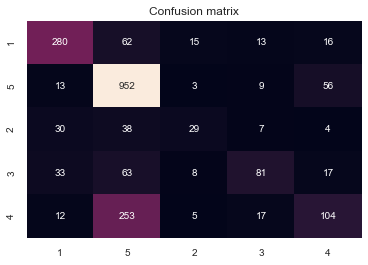

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

categories = main_frame.rating.unique()
sns.heatmap(data=confusion_matrix(y_test_cc, forest_preds, labels = categories), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [156]:
acc = accuracy_score(svc_preds, y_test_ctf)
micro_f1 = f1_score(svc_preds, y_test_ctf, average = 'micro')
micro_p = precision_score(svc_preds, y_test_ctf, average = 'micro')
micro_r = recall_score(svc_preds, y_test_ctf, average = 'micro')
macro_f1 = f1_score(svc_preds, y_test_ctf, average = 'macro')
macro_p = precision_score(svc_preds, y_test_ctf, average = 'macro')
macro_r = recall_score(svc_preds, y_test_ctf, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6854
micro F1=0.6854, micro P=0.6854, micro R=0.6854
macro F1=0.5199, macro P=0.4941, macro R=0.6351



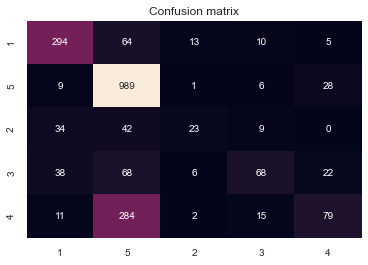

In [157]:
sns.heatmap(data=confusion_matrix(y_test_ctf, svc_preds, labels = categories), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

# выводы

### регрессия

что ж, регрессия. В принципе, полученные нами МАЕ (494 и 472) это очень даже неплохо для цен в диапазоне от 127 до 7480. ТФ-ИДФ зачастую действительно помогал делу - в среднем модели, обученные на нем, обучались лучше тех, что были обучены на выдаче count_vectorizer. Возможно, дело в том, что в описании продуктов куда меньше однотипных слов, повторяющихся и 

Невероятно, но факт - наши результаты в лучшую сторону отличаются от результатов большинства опрошенных нами сокурсников! Что интересно, потому что мы выкинули практически треть датасета при обработке. Причем для задачи регрессии признак количества отзывов, на который мы при этом ссылались, даже не актуален - на отзывы мы здесь вообще не опираемся - но вот поди ж ты. Возможно, что-то объединяет модели, получившие мало отзывов, и это что-то имеет связи с ценой?

Нельзя не обратить внимание на то, что происходит с моделькой обычной линейной регрессии - а именно, ее МАЕ улетает куда-то в триллионы. Если посмотреть на сами предсказания, они тоже где-то в триллионах, так в чем же дело?
Вероятно, в том, что наша бедная линейная регрессия не справляется с такой размерностью матрицы. Для того, чтобы это профиксить, можно было бы свернуть матрицу, и все бы скорее всего заработало нормально.

Наши модельки-финалисты, CatBoost и LGBM, в принципе не так уж удивляют - лично мне в основном было удивительно увидеть результаты Ады. Этот бустер меня никогда еще не подводил, но, видимо, я его только на числовых данных использовала, а векторы ему не нравятся совсем. Упс?

CatBoost, в принципе, ожидаем - хоть один бустер здесь должен был оказаться, ведь ансамбли из нескольких более простых моделей весьма успешны! Хотя и бегают подольше. Зато у него график гридсерча удобный и интуитивно понятный.

### классификация

Вы посмотрите только на эти прелестные матрицы ошибок!

Как мы и ожидали, модельки больше запутались с господствующим пятым классом - в него они на всякий случай скинули...много чего.

Весьма интересно, что вот тут чаще всего точность повышалась при использовании обычного count_vectorizer - это оказалось справедливым для одной из наших финальных моделей, SVC все же предпочел ТФ-ИДФ. Если посмотреть на отзывы, становится заметно, насколько часто в них встречаются однотипные повторяющиеся слова, особенно когда дело касается отзывов на двоечку и единицу, так что тут ТФ-ИДФ видимо и правда мог как помочь, так и помешать.

Судя по сравнению с сокурсниками, выкинуть треть датасета оказалось и правда неплохой ставкой! Хотя казалось бы. Видимо, на концептуальном уровне это аналогично отбрасыванию аномалий...просто многовато этих аномалий, мда. Но, кажется, варианты с малым количеством отзывов и правда не очень-то хорошо влияли на обучение моделек.

SVC - алгоритм классификации, реализация которого основана на libsvm, а RandomForest - лес из случайных деревьев, который сам определяет, какое дерево лучше всего справляется с поставленной задачей. Они оба звучат хорошо! А лес из случайных деревьев, по личному опыту, очень здорово справляется с задачами маленьких датасетов и нехватки информации. А информации нам и правда не хватает - мы же треть выкинули. Но она нам не нравилась!

Занятно, что леса менее склонны скидывать все в пятый класс - например, именно поэтому они лучше справились с распознаванием четвертого класса, потому что реже спихивали его в пятый. Тем не менее, пятый они тоже признавали пятым реже - вероятно, произошла забавная ирония и они чуть-чуть уступают СВК в точности именно потому, что с меньшей готовностью относили что-то к пятому классу.